# Predicting student performance based on previous grades

Original dataset: https://archive.ics.uci.edu/ml/datasets/student+performance

#### Data Set Information:

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

### Attributes

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2 sex - student's sex (binary: 'F' - female or 'M' - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: 'U' - urban or 'R' - rural)

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

### these grades are related with the course subject

31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target) -- **TARGET**

In [1]:

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import ipywidgets as widgets


from fairlearn.reductions import GridSearch
from fairlearn.reductions import DemographicParity, ErrorRate


In [2]:
df_raw = pd.read_csv("../data/student-math.csv")
df_raw.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Deployment context

#### Placement in remedial classes
- Many schools and universities use previous grades to predict whether a student is likely to fail a subject.
- USA: Use GPA instead of placement test scores https://www.wbur.org/edify/2018/03/05/remedial-college-classes

#### Higher education placement
- UK: "A predicted grade is the grade of qualification an applicant’s school or college believes they’re likely to achieve in positive circumstances." [link](https://www.ucas.com/advisers/managing-applications/predicted-grades-what-you-need-know)

#### Predicting final grades in lieu of assessment

- Due to unexpected crises (e.g., cancelled exams due to COVID-19):
    - [Cambridge Assessment International Education](https://www.cambridgeinternational.org/Images/581596-guide-to-determining-predicted-grades-and-ranking-candidates.pdf)
    - [International Baccalaureate](https://www.ibo.org/news/news-about-ib-schools/the-assessment-and-awarding-model-for-the-diploma-programme-may-2020-session/)
    - UK: "GCSE and A-level results are expected to be awarded based on predicted grades and teacher assessment after schools were closed and exams cancelled, leading to concerns that minority ethnic and working-class pupils will be disadvantaged." [link](https://www.theguardian.com/world/2020/mar/19/fears-that-cancelling-exams-will-hit-black-and-poor-pupils-worst)

- In case of illness:

    - UK - "When they heard about Cosima's illness, the school told Romana that if her daughter missed both exams for a given subject she would have to repeat the year. But if she only missed one of the two allotted exams for any subject, she would have the option of applying for special consideration. Under that process, the exam board would be able to use Cosima's predicted grades as well as testimony from the school to help determine her final classification." [link](https://www.independent.co.uk/student/student-life/health/if-illness-strikes-what-do-you-do-as-two-years-work-threatens-to-go-up-in-smoke-2054076.html)

### Protected attributes

Selected based on the sample scenarios mentioned above.

- Sex - `sex` (binary, male `1` or female `0`)
- Academic intervention
    -  `schoolsup` - extra educational support (binary: yes `1` or no `0`)
    - `famsup` - family educational support (binary: yes `1` or no `0`)
    - `paid`  - extra paid classes within the course subject (binary: yes `1` or no `0`)
- Academic performances (not grades)
    - `failures` -  number of past class failures (transformed to binary: no past failures `0` or at least 1 previously failed class `1`)
- Health
    - `health` - current health status (transformed to binary: bad-very bad `0` or average-very good `1`)
    

In [3]:
# binarizing failures and health
for idx, failure in enumerate(df_raw["failures"]):
    if failure == 0: # failed no classes
        df_raw.loc[idx, "failures_binary"] = 0
    else: # failed one class
        df_raw.loc[idx, "failures_binary"] = 1

for idx, health in enumerate(df_raw["health"]):
    if health < 3: # bad to very bad
        df_raw.loc[idx, "health_binary"] = 0
    else: # average to very good
        df_raw.loc[idx, "health_binary"] = 1
        
for column in ["failures_binary", "health_binary"]:
    df_raw[column] = df_raw[column].astype("category")

### Some EDA

How large is the dataset?

In [24]:
print("Number of students in dataset: ", df_raw.shape[0])

Number of students in dataset:  395


#### Final Grade - Target variable

Originally on a scale of 0 (worst) - 20 (best). Transformed into binary target according to original study.

There are more students who have passed than failed (i.e., dataset is imbalanced)

In [4]:
# make target "G3" (final grades) binary - according to original paper
for idx, grade in enumerate(df_raw["G3"]):
    if grade >= 10: # pass
        df_raw.loc[idx, "target"] = 1
    else: # fail
        df_raw.loc[idx, "target"] = 0

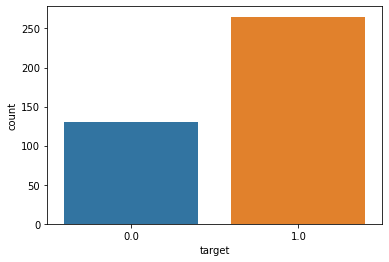

In [25]:
# target variable - final grade
sns.countplot("target", data=df_raw)

#### Gender
Fewer male students fail than female students

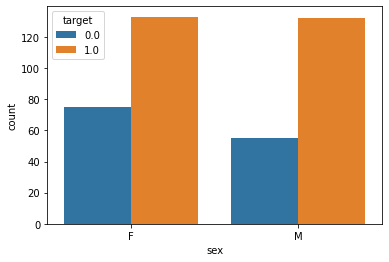

In [6]:
# binary gender
sns.countplot("sex", hue="target", data=df_raw)

#### School support

How many (%) students receive school support for math? 

In [36]:
schoolsup_pct = df_raw["schoolsup"].value_counts(normalize='True') * 100

print(f"Students receiving school support: {round(schoolsup_pct[1], 2)}%")

Students receiving school support: 12.91%


Close to half of students receiving school support still fail

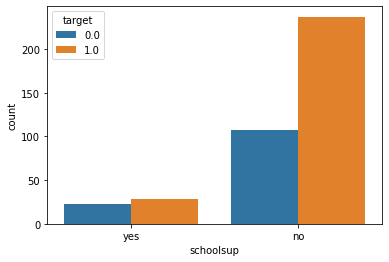

In [7]:
# school support
sns.countplot("schoolsup", hue="target", data=df_raw)

#### Family support

How many (%) students receive family support for math? 

In [39]:
famsup_pct = df_raw["famsup"].value_counts(normalize='True') * 100

print(f"Students receiving family support: {round(famsup_pct[0], 2)}%")

Students receiving family support: 61.27%


More students receiving family support fail than students who don't receive family support

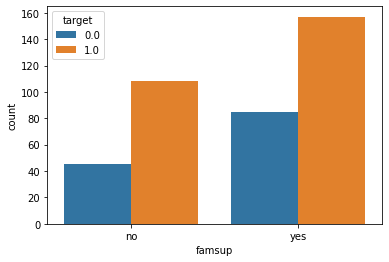

In [8]:
# family support - half as many students with family support still fail
sns.countplot("famsup", hue="target", data=df_raw)

#### Paid extra classes

Fewer fails among students receiving extra classes

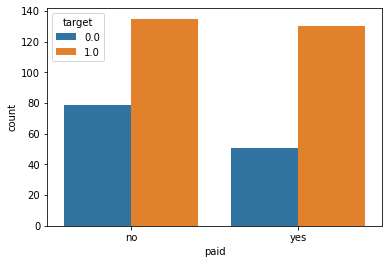

In [9]:
# paid extra classes, fewer fails
sns.countplot("paid", hue="target", data=df_raw)

#### Failing previous classes

More fails among students who have failed a class previously.

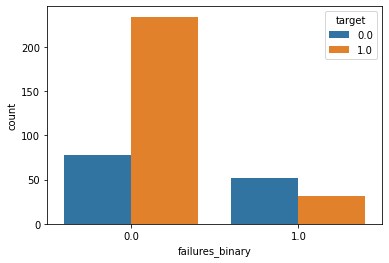

In [10]:
# previous failures - most students who have failed a class have failed final grade
sns.countplot("failures_binary", hue="target", data=df_raw)

#### Health status



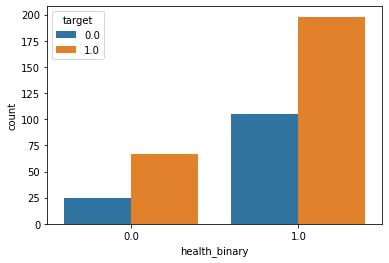

In [11]:
sns.countplot("health_binary", hue="target", data=df_raw)

### Selecting protected attributes

In [12]:
A = df_raw[["sex", "schoolsup", "famsup", "paid", "failures_binary",  "health_binary"]] # protected attributes
df = df_raw[["G1", "G2", "G3", "target"]]  # keep grades features/targte

In [13]:
#num_cols = ["G3", "age", "absences", "G1", "G2"]
#cat_cols = []
 
#for column in df.columns:
#    if column not in num_cols:
#        cat_cols.append(column)

## Create feature matrix and target series, split data (stratified)

In [14]:
# helper functions for splitting data

def split_data_stratified(features_encoded, target_series, protected_attribute, train_size, random_state=None):
    '''
    Splits data into stratified fashion
    '''
    (
        features_train,
        features_test,
        target_train,
        target_test,
        A_train,
        A_test,
    ) = train_test_split(
        features_encoded,
        target_series,
        protected_attribute,
        stratify=target_series,
        train_size=train_size,
        random_state=random_state,
    )
    return features_train, features_test, target_train, target_test, A_train, A_test

In [15]:
# target and feature space
target = df["target"]


# excluding "G1" 
features = df[df.columns.difference(["G3", "target"])]

In [16]:
# split data

features_train, features_test, target_train, target_test, A_train, A_test = split_data_stratified(
    features_encoded=features,
    target_series=target,
    protected_attribute=A,
    train_size=0.7,
    random_state=42)

## Logistic regression

In [18]:
lr = LogisticRegression(random_state=42, max_iter=1000)
#lr.fit(features_train_scaled, target_train)
lr.fit(features_train, target_train)

LogisticRegression(max_iter=1000, random_state=42)

### Fairness-unaware model

              precision    recall  f1-score   support

         0.0       0.78      0.92      0.85        39
         1.0       0.96      0.88      0.92        80

    accuracy                           0.89       119
   macro avg       0.87      0.90      0.88       119
weighted avg       0.90      0.89      0.89       119

ROC AUC Score is 0.9628205128205128
Cross-validation scores: [0.96230441 0.98048048 0.98273273 0.98723724 0.97747748]
Mean cross-validation score: 0.98


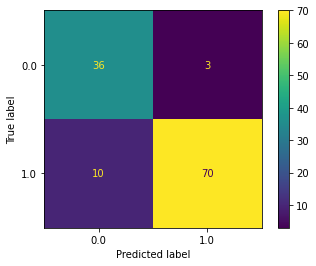

In [19]:
target_pred = lr.predict(features_test)
target_pred_proba = lr.predict_proba(features_test)


print(classification_report(target_test, target_pred))

plot_confusion_matrix(lr, features_test, target_test)

roc_auc = roc_auc_score(target_test, target_pred_proba[:, 1])
print(f"ROC AUC Score is {roc_auc}")

# cross validation
cv_score = cross_val_score(lr, features_train, target_train, scoring="roc_auc")
mean_cv_score = round(np.mean(cv_score), 2)

print(f"Cross-validation scores: {cv_score}")
print(f"Mean cross-validation score: {mean_cv_score}")

### Fairlearn Dashboard

In [20]:
from fairlearn.widget import FairlearnDashboard

FairlearnDashboard(
    sensitive_features=A_test,
    sensitive_feature_names=["sex", "schoolsup", "famsup", "paid", "failures_binary", "health_binary"],
    y_true=target_test,
    y_pred=lr.predict(features_test),
)

FairlearnWidget(value={'true_y': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1…